# Early Stage Diabetes Prediction and Analysis

This notebook uses "Early stage diabetes risk predection" dataset that has data collected using direct questionnaires from the patients of Sylhet Diabetes Hospital, Bangladesh.

**Importing all libraries** :

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

**Reading the csv file** :

In [2]:
data = pd.read_csv("../input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Converting all features to processable values using scikt-learn's Label Encoder** :

In [3]:
label = preprocessing.LabelEncoder()
cols = ["Gender","Polyuria","Polydipsia","sudden weight loss","weakness","Polyphagia","Genital thrush","visual blurring","Itching","Irritability","delayed healing","partial paresis","muscle stiffness","Alopecia","Obesity","class"]
data[cols]= data[cols].apply(label.fit_transform)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Exploring Features

## Age
Age is often considered a important feature, lets see it's significance in this dataset.

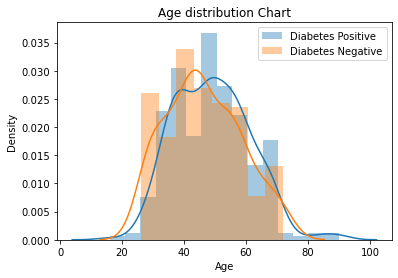

,Age Diabetes Positive,Age Diabetes Negative
count,320.000000,200.000000
mean,49.071875,46.360000
std,12.097481,12.080983
min,16.000000,26.000000
25%,39.000000,37.000000
50%,48.000000,45.000000
75%,57.000000,55.000000
max,90.000000,72.000000


In [4]:
AgePos = data.where(data["class"]==1)["Age"]
AgeNeg = data.where(data["class"]==0)["Age"]

ageDist = pd.DataFrame({"Age Diabetes Positive":AgePos.values.tolist(),"Age Diabetes Negative":AgeNeg.values.tolist()})

sns.distplot(AgePos,label="Diabetes Positive")
sns.distplot(AgeNeg,label="Diabetes Negative")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age distribution Chart")
plt.show()

ageDist.describe()

**Inference :**
It seems there isn't much difference in density of age feature for Diabetes Positive and Diabetes Negative. Thus, we will not include age as a feature for our prediction.

## Gender

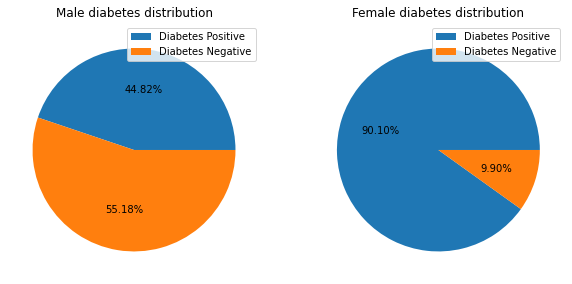

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
male = data.where(data["Gender"]==1).dropna()["class"].values.tolist()
malePos = male.count(1)
maleNeg = male.count(0)
plt.pie([malePos,maleNeg],autopct='%1.2f%%')
plt.title("Male diabetes distribution")
plt.legend(labels=["Diabetes Positive","Diabetes Negative"])
plt.subplot(1,2,2)
female = data.where(data["Gender"]==0).dropna()["class"].values.tolist()
femalePos = female.count(1)
femaleNeg = female.count(0)
plt.pie([femalePos,femaleNeg],autopct='%1.2f%%')
plt.title("Female diabetes distribution")
plt.legend(labels=["Diabetes Positive","Diabetes Negative"])
plt.show()

**Inference :**
There is a huge diabetes positive:negative ratio for Males and Females in this specific dataset, due to this Gender as a feature will play a major role for our prediction using this specific dataset.

## Rest of the Features
Instead of analysing every feature one by one, I have just created a function to pie chart diabetes postive:negative ratio for each feature, so that I can decide which features will be good to be used for further predictions

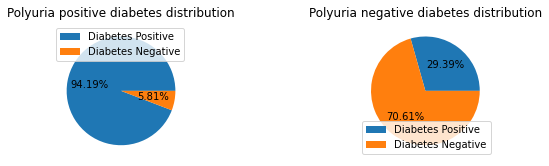

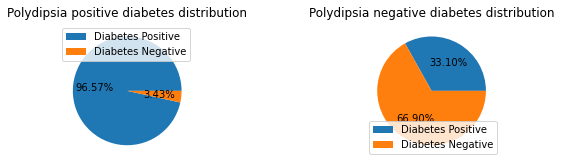

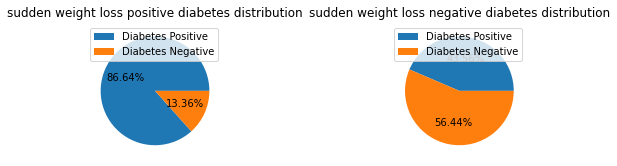

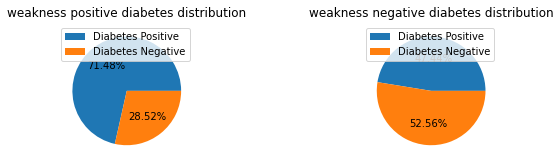

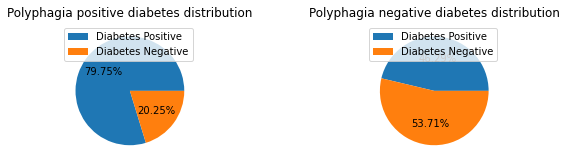

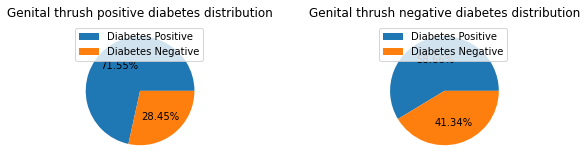

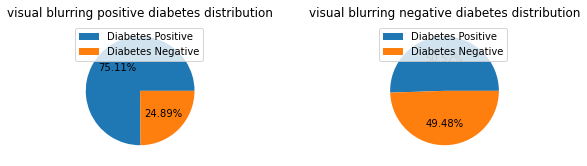

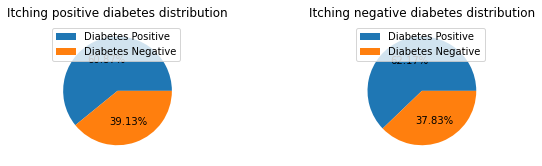

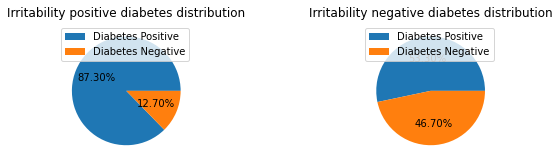

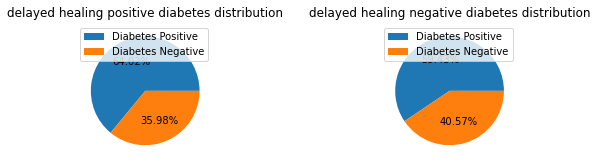

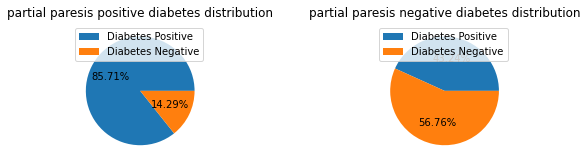

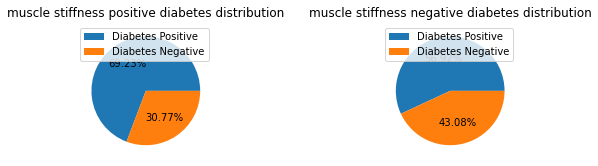

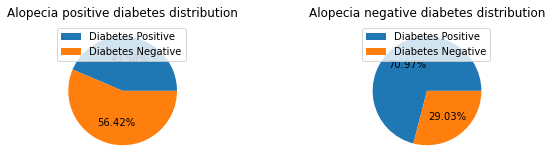

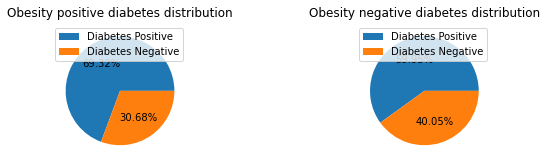

In [6]:
def yoyo(fetname):
    plt.figure(figsize=(10,2.5))
    plt.subplot(1,2,1)
    fet = data.where(data[fetname]==1).dropna()["class"].values.tolist()
    fetPos = fet.count(1)
    fetNeg = fet.count(0)
    plt.pie([fetPos,fetNeg],autopct='%1.2f%%')
    plt.title(fetname+" positive diabetes distribution")
    plt.legend(labels=["Diabetes Positive","Diabetes Negative"])
    plt.subplot(1,2,2)
    fet1 = data.where(data[fetname]==0).dropna()["class"].values.tolist()
    fet1Pos = fet1.count(1)
    fet1Neg = fet1.count(0)
    plt.pie([fet1Pos,fet1Neg],autopct='%1.2f%%')
    plt.title(fetname+" negative diabetes distribution")
    plt.legend(labels=["Diabetes Positive","Diabetes Negative"])
    plt.show()
for i in ["Polyuria","Polydipsia", "sudden weight loss","weakness","Polyphagia","Genital thrush","visual blurring" ,"Itching" ,"Irritability","delayed healing","partial paresis","muscle stiffness","Alopecia","Obesity"]:
    yoyo(i)

**Inference :**

It seems all above the features have good enough diabetes postive:negative ratio to be considered, except the following features :
* Age : Reason given the previous cells
* Itching : as there isn't much difference in diabetes positive:negative ratio of sample of patients that have itching vs patients who don't 